<a href="https://colab.research.google.com/github/villafue/LinkedIn_Python_Stastics_Essential_Training/blob/master/05_08_solution_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Python statistics essential training - 05_07_solution

Standard imports

In [ ]:
'''
The challenge is to find a model that fits the gapminder 1985 babies per woman data
better than our best model so far, region plus survival at age 5, as judged using
our cross validation criteria. So the cross validation that we need to beat is a
little more than one.

Hint: Think about adding not just explanatory variables, but functions of explanatory
variables. The easiest way to do so is to add a new column to the data.
'''

In [1]:
import math
import os

In [2]:
os.chdir('sample_data')

In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Loading gapminder data for year 1985 (Live Aid!).

In [7]:
gapminder = pd.read_csv('gapminder.csv')

In [8]:
gdata = gapminder.query('year == 1985')

Refactored plotting so that it works on arbitrary datasets.

In [13]:
def sc(data):
    return 1e-6 * data.population, data.region.map({'Africa': 'skyblue', 'Europe': 'gold',
                                                   'America': 'palegreen', 'Asia': 'coral'})

def plotdata(data=gdata):
    size, colors = sc(data)
    data.plot.scatter('age5_surviving','babies_per_woman',
                      c=colors,s=size,linewidths=0.5,edgecolor='k',alpha=0.5)
                      
def plotfit(fit,data=gdata):
    plotdata(data)

    size, colors = sc(data)
    plt.scatter(data.age5_surviving,fit.predict(data),
               c=colors,s=30,linewidths=0.5,edgecolor='k',marker='D')

Our cross-validation function

In [10]:
# we'll make a function that is generic in terms of formula and response variable
def cross_validate(data,formula,response,n=100):
    ret = []
    
    for i in range(n):
        shuffled = data.sample(len(data))
        
        training = shuffled.iloc[:len(data)//2]
        testing = shuffled.iloc[len(data)//2:]
        
        trained = smf.ols(formula,data=training).fit()
        
        resid = trained.predict(testing) - testing[response]
        df = len(testing) - trained.df_model - 1
        mse = np.sum(resid**2) / df
    
        ret.append(mse)
    
    return np.mean(ret)

The best model formula we've found

In [11]:
f_surviving = 'babies_per_woman ~ -1 + region + age5_surviving'

1.0851442163891987

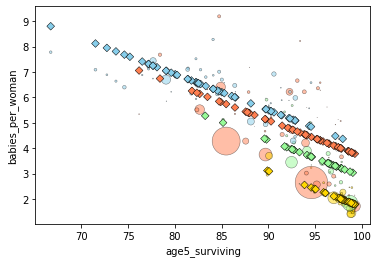

In [14]:
fit = smf.ols(f_surviving,gdata).fit()
plotfit(fit,gdata)
cross_validate(gdata,f_surviving,'babies_per_woman')

0.9551777322703913

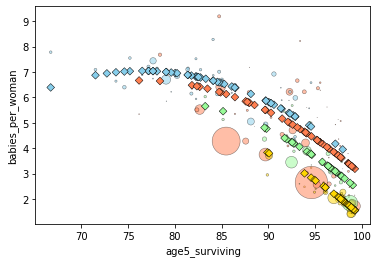

In [15]:
'''
His solution was to go beyond the linear dependence on age 5 surviving and adding
a quadratic term (pow...). 

The cross-validation means that Quintero is about 0.94 (whatever that means).
'''
formula = 'babies_per_woman ~ -1 + region + age5_surviving + pow(age5_surviving,2)'
fit = smf.ols(formula,gdata).fit()
plotfit(fit,gdata)
cross_validate(gdata,formula,'babies_per_woman')

In [16]:
'''
This code her just states that if we were not able to input the (pow) code above,
we could have just done it by adding a new column as written below.
'''
gdata['age5_surviving2'] = gdata.age5_surviving**2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
